<a href="https://colab.research.google.com/github/Nuggets8675309/gdp-dashboard/blob/main/assignment3_Daniel_Garcia_Estuesta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3  Bacteria Dynamics

## Learning Objectives
* Implement a stochastic simulation of bacteria population dynamics
* Use inferential statistics to estimate event probabilities
* Plot distribution of values in a set of data

#  Bacteria Dynamics


In this assignment, you will design and implement a stochastic simulation of bacteria population dynamics.  You will spend two weeks on this assignment.  By the end of the assignment, you will reach conclusions about how various random variables affect the spread of the bacteria based on the simulation results.

You should write code based on the provided skeleton in this document (code cells) for the solutions to address each problem in the assignment.



# Background

## Bacteria
Bacteria are single-celled organisms that reproduce asexually. Some bacteria cause diseases, some are harmless, and some are beneficial. Bad bacteria can cause infections such as strep throat and tuberculosis. Bacterial infections are treated with antibiotics targeted to kill only the bad bacterial cells.
Bacteria that cause infections can resist and develop a resilience to antibiotics naturally and/or via use of antibiotics. Thus, populations of bacteria can undergo substantial evolutionary changes within a single patient over the course of treatment. In this assignment, we would like to focus on how populations of bacteria change within a single patient over time.  

## Computational Model
In the assignment problem set, we will implement a highly simplified stochastic model of bacteria population dynamics within a person. Nevertheless, our model exhibits biologically relevant characteristics and will give you a chance to analyze and interpret interesting simulation data.

The document below provides you with some skeleton code you can start with. Please do not change any of the provided skeleton code except to delete # TODO and replace **pass** that follows the comment.  


In [4]:
#This code is to run the ipynb document at Google Colab
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

# Problem 1 Create SimpleBacteria class

The SimpleBacteria class maintains the state of a single bacteria. You will implement the following methods according to the docstring specifications:

```Python
 __init__
 reproduce
 ```

The *is_killed* function actually is complete.  I provide it here for your reference to define the others. Please pay attention to the definition of the function, especially the use of **random.random()** for generating random numbers between 0 and 1.


The skeleton code in the code cells provides you some hints for you to start with.


**Hint**: During debugging, use random.seed(0) before your other random calls.  By this way, all "random" calls will be the same each time you run your file, and so your code will behave the same way each time you run it, which can be useful for debugging purposes.


In [33]:
import random

##########################
# PROBLEM 1
##########################

class NoChildException(Exception):
    """Raised when bacteria does not reproduce"""
    pass

class SimpleBacteria(object):
    """A simple bacteria cell with no antibiotic resistance"""

    def __init__(self, birth_prob, death_prob):
        self.birth_prob = birth_prob
        self.death_prob = death_prob

    def is_killed(self):
        return random.random() <= self.death_prob

    def reproduce(self, pop_density):
        reproduction_prob = self.birth_prob * (1 - pop_density)
        if random.random() <= reproduction_prob:
            return SimpleBacteria(self.birth_prob, self.death_prob)
        else:
            raise NoChildException()

random.seed(0)
bacteria = [SimpleBacteria(0.2, 0.05) for _ in range(5)]
print("Testing is_killed():", [b.is_killed() for b in bacteria])
for i, b in enumerate(bacteria):
    try:
        child = b.reproduce(0.1)
        print(f"Bacteria {i} reproduced: {isinstance(child, SimpleBacteria)}")
    except NoChildException:
        print(f"Bacteria {i} did not reproduce")


Testing is_killed(): [False, False, False, False, False]
Bacteria 0 did not reproduce
Bacteria 1 did not reproduce
Bacteria 2 did not reproduce
Bacteria 3 did not reproduce
Bacteria 4 did not reproduce


# Problem 2  Create Patient class

The Patient class maintains the state of a bacterial population associated with a patient. You will
implement the following methods according to the docstring specification:

```Python
__init__
get_total_pop
update
```

For the update function definition, make sure you read the docstring specification and write your code following the steps in the specification.

In [3]:
##########################
# PROBLEM 2
##########################

class Patient(object):
    def __init__(self, bacteria, max_pop):
        self.bacteria = bacteria[:]
        self.max_pop = max_pop

    def get_total_pop(self):
        return len(self.bacteria)

    def update(self):
        # Step 1: Survivors
        survivors = [b for b in self.bacteria if not b.is_killed()]
        # Step 2: Population density
        pop_density = len(survivors) / self.max_pop
        # Step 3: Reproduction
        offspring = []
        for b in survivors:
            try:
                child = b.reproduce(pop_density)
                offspring.append(child)
            except NoChildException:
                continue
        # Step 4: Update population
        self.bacteria = survivors + offspring
        return self.get_total_pop()

random.seed(0)
initial_bacteria = [SimpleBacteria(0.2, 0.05) for _ in range(5)]
patient = Patient(initial_bacteria, max_pop=20)
print("Initial population:", patient.get_total_pop())
for step in range(5):
    pop = patient.update()
    print(f"Step {step+1} population: {pop}")


Initial population: 5
Step 1 population: 5
Step 2 population: 5
Step 3 population: 6
Step 4 population: 6
Step 5 population: 7


In [32]:
l1 = [1, 2, 3]
l2 = [4, 5, 6]
l = l1 + l2
print(l)

[1, 2, 3, 4, 5, 6]


# Problem 3 Running and Analyzing a Single Trial Simulation

In this part you will understand the behavior of a group of bacteria cells as time passes through a simulation. You need to implement the function
  * simulation_singletrial_bacteria
  
  according to the behavior described in the docstring in the below code cell.
  
  
At the end of your simulation_singletrial_bacteria, you need to produce a plot, which should display the bacteria population over time.

Warning: It may take some time to generate the plot especially when your computer system is relatively slow or memory limited. So, please be patient.


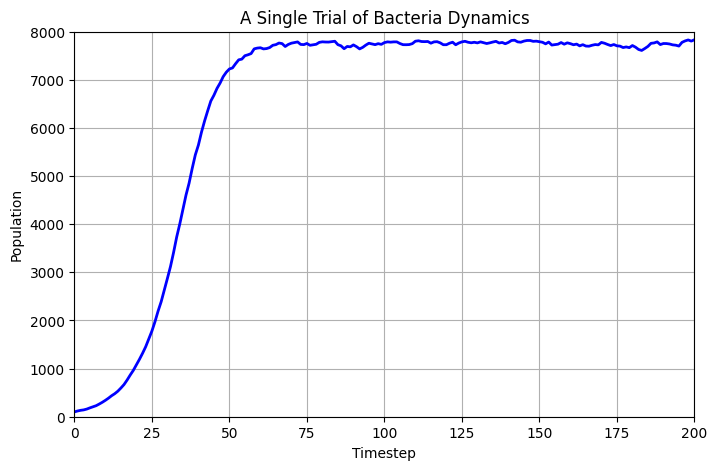

In [28]:
import matplotlib.pyplot as plt

##########################
# PROBLEM 3
##########################

def simulation_singletrial_bacteria(num_bacteria,
                                    max_pop,
                                    birth_prob,
                                    death_prob,
                                    num_steps,
                                    to_plot=False):
    """
    Run a single trial simulation and return a population of bacteria.

    To simulate a single bacteria dynamics:
        * Instantiate a list of SimpleBacteria of size num_bacteria
        * Instantiate a Patient using max_pop and the list of SimpleBacteria
        * Simulate changes to the bacteria population for num_steps timesteps,
          recording the bacteria population after each step. The first element
          of the returned list is the starting population.

    Args:
        num_bacteria (int): number of SimpleBacteria to create for patient
        max_pop (int): maximum bacteria population for patient
        birth_prob (float in [0,1]): reproduction probability
        death_prob (float in [0,1]): death probability
        num_steps (int): number of time steps
        to_plot (bool): whether to plot population over time

    Returns:
        population (list): population size at each timestep
    """

    # Step 1: Create initial bacteria list
    bacteria_list = [SimpleBacteria(birth_prob, death_prob) for _ in range(num_bacteria)]

    # Step 2: Instantiate a Patient with max_pop and bacteria_list
    patient = Patient(bacteria_list, max_pop)

    # Step 3: Simulate timesteps and record populations
    population = [patient.get_total_pop()]  # starting population at t=0
    for _ in range(num_steps):
        population.append(patient.update())

    # Step 4: Plot if requested
    if to_plot:
        plt.figure(figsize=(8,5))
        x_vals = range(len(population))
        plt.plot(x_vals, population, color='blue', linewidth=2)
        plt.xlabel("Timestep")
        plt.ylabel("Population")
        plt.title("A Single Trial of Bacteria Dynamics")
        plt.xlim(0, num_steps)
        plt.ylim(0, 8000)  # set 8000 as top line
        plt.grid(True)
        plt.show()

    return population

random.seed(0)

# Run a single trial simulation
population = simulation_singletrial_bacteria(
    num_bacteria=100,
    max_pop=10000,
    birth_prob=0.2,
    death_prob=0.05,
    num_steps=200,
    to_plot=True
)


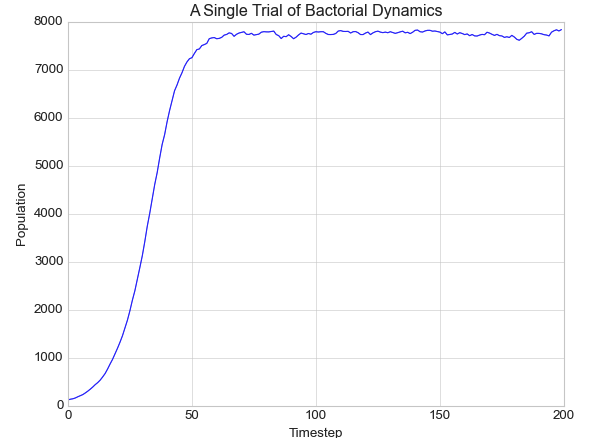

In [ ]:
from IPython.display import Image
Image(filename="/content/drive/MyDrive/APCV361/Assignments/a3/p3.png")

# Problem 4 Running and Analyzing Multiple Trials

In this part you will continually simulate and understand the behavior of a group of bacteria cells as time passes. To address this problem, you need to implement the functions
  * calc_avg_popsize
  * simulation_multitrials_bacteria
  
  according to the behavior described in the docstrings in the provided code.
  
While you must implement *calc_avg_popsize*, you are also **required** to use it while implementing *simulation_multitrials_bacteria*. (That is, you need to call *calc_avg_popsize* in your function definition of *simulation_multitrials_bacteria*.
  
When calling *simulation_multitrials_bacteria*, if to_plot is True, the function implementation produces a plot of your results as well as the populations. The plot should display the average bacteria population over time. You plot the average population across num_trials, so that the resulting curve is smooth and shows a general trend rather than the particular details of any one trial.

Warning: It may take some time to generate the plot especially when your computer system is relatively slow or memory limited.

Hint: simulation_multitrials_bacteria asks you to return a 2D list of populations at each time step for each trial such that populations[i][j] would be the population for the trial i at time step j. This means that if we are running 2 trials for 5 time steps, populations may look something like:
[ [10, 34, 22, 40, 21], [15, 27, 32, 25, 41] ]


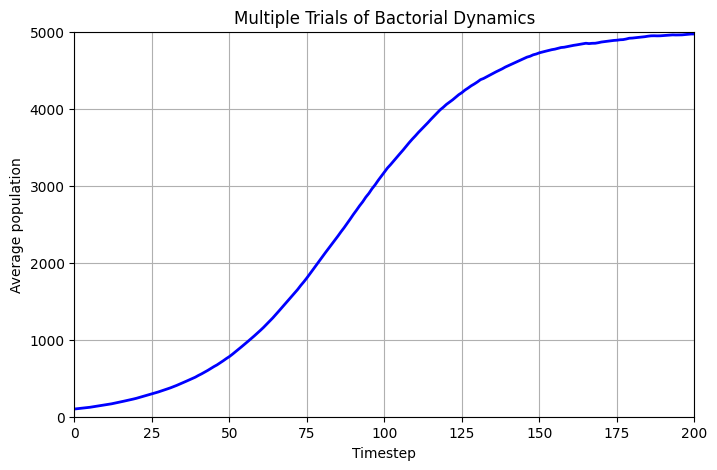

In [26]:
##########################
# PROBLEM 4
##########################

def calc_avg_popsize(populations, n):
    """
    Finds the average bacteria population size across trials at time step n

    Args:
        populations (list of lists or 2D array): populations[i][j] is the
            number of bacteria in trial i at time step j
        n (int): n indicates a time step point

    Returns:
        float: The average bacteria population size at time step n
    """
    total = sum(trial[n] for trial in populations)
    avg = total / len(populations)
    return avg


def simulation_multitrials_bacteria(num_bacteria,
                                    max_pop,
                                    birth_prob,
                                    death_prob,
                                    num_steps,
                                    num_trials,
                                    to_plot=False):
    """
    Run multiple trials of the bacterial dynamics.

    For each of the num_trials trials:
        * instantiate a list of SimpleBacteria
        * instantiate a Patient using max_pop and the list of SimpleBacteria
        * simulate changes to the bacteria population for num_steps timesteps,
          recording the bacteria population after each time step

    Args:
        num_bacteria (int): number of SimpleBacteria to create for patient
        max_pop (int): maximum bacteria population for patient
        birth_prob (float): reproduction probability
        death_prob (float): death probability
        num_steps (int): number of time steps
        num_trials (int): number of simulation runs to execute
        to_plot (bool): plot the population sizes over the time steps if True

    Returns:
        populations (list of lists): populations[i][j] is the number of bacteria in trial i at time step j
    """

    # 2D list to store all trials
    populations = []

    for trial in range(num_trials):
        pop_history = simulation_singletrial_bacteria(
            num_bacteria=num_bacteria,
            max_pop=max_pop,
            birth_prob=birth_prob,
            death_prob=death_prob,
            num_steps=num_steps,
            to_plot=False  # do not plot individual trials
        )
        populations.append(pop_history)

    if to_plot:
        # compute average population at each timestep
        avg_population = [calc_avg_popsize(populations, t) for t in range(num_steps + 1)]

        plt.figure(figsize=(8,5))
        plt.plot(range(num_steps + 1), avg_population, color='blue', linewidth=2)
        plt.xlabel("Timestep")
        plt.ylabel("Average population")
        plt.title("Multiple Trials of Bactorial Dynamics")
        plt.xlim(0, num_steps)
        plt.ylim(0, 5000)  # fixed top line at 5000
        plt.grid(True)
        plt.show()

    return populations


random.seed(0)

populations = simulation_multitrials_bacteria(
    num_bacteria=100,
    max_pop=10000,  # actual population can exceed 5000, plot y-axis is capped
    birth_prob=0.1,
    death_prob=0.05,
    num_steps=200,
    num_trials=50,
    to_plot=True
)


In [31]:
from IPython.display import Image
Image(filename="/content/drive/MyDrive/APCV361/Assignments/a3/p4.png")

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/APCV361/Assignments/a3/p4.png'

# Problem 5 Reflection

After you finish approaching the above problems, you need to reflect on the learning process.  Below are the questions you need to address in your reflection.  
* What strategies did you use to solve the problems?
* What were the most challenging aspects of this assignment? How did you overcome these challenges? If you couldn’t fully overcome them, what steps did you take to try?
* What are the key takeaways or lessons you learned from this assignment? How do you think the skills and concepts in this assignment might apply to real-world siutations or future projects?

# Turn-in
You need to turn in at least one file for your submission:

* Your notebook file that contains the cells with output presentation

* Any other supplementary documents you want to submit to D2L Assignments folder

You need to package the files into a zip archive and upload the zip file to D2L assignment folder <b>Assignment 3</b>
